## A notebook for calculating the Ising model of spin alignment

# Introduction

Electrons possess magnetic dipole moments due to their orbital 'motion' around the nucleus and due to their intrinsic spin. In the case of Russel-Sanders coupling, the individual electron spins gives a resultant spin S for the ion (atom), while individual orbital angular momenta couple to give a resultant orbital momentum L. These two magnetic components couple to give a total angular momentum J = L + S. If the number of electrons orbiting the nucleus is such that some of the atomic subshells are only partially filled, L and/or S are non-zero and so the ion as a whole will have a net magnetic dipole moment.

Consider a crystalline structure made up of ions. There are 3 interactions:

- Exchange interactions between the spin part of the total electronic angular momentum on the magnetic ions. These interactions are electrostatic and are due to electronic wave functions on neighbouring ions and the interaction strength depends on the relative directions of the interacting spins.

- the interaction of the orbital part of the electronic angular momentum with the surrounding charge distribution in the crystal. The charge distribution is considered to set up an effective field at the ionic known as the crystal (or anistropy) field. The field has the same symmetry as the crystal and tends to align the orbital electronic moments in a preferred direction relative to the crystal axes.

- the long range dipole-dipole interaction between magnetic moments. Same as two magnets on a macroscopic scale. This interaction tends to align magnetic dipoles antiparallel to one another, however is much weaker than the other two interactions on an atomic scale.

The energies of the interactions depend on the individual ionic magnetic moments relative to one another and relative to the crystal lattice. Since the free energy of a solid in thermal equilibrium tends to a minimum, the final arrangement of the ionic magnetic moments at a given temperature will then depend on the size of energy of each interaction.

# Ising Model

Idealised study of magnetic behaviour in a solid

- Regular n dimensional grid of electrons with spin S that can have a value of +1 or -1
- Only interact with closest neighbours
- The spins as a group will align into the lowest energy state as determined by the Hamiltonian
- If the grid is isolated then $H = -\Sigma J_{ij} S_i \cdot S_j$ where $J_{ij}$ is the interaction energy between neighbouring spins.
- If there is an applied magnetic field then there is an extra $-\mu \Sigma S \cdot B$ term where the $\mu$ is the magnetic moment of each electron.
- If the interaction energy $J_{ij}$ is positive then the lattice is ferromagnetic and the neighbouring spins prefer to align. If the interaction energy $J_{ij}$ is negative, then the lattice is antiferromagnetic and the neighbouring spins prefer to be opposed. 
- With an external magnetic field, spins prefer to align with the field.
- Thermal energy in the lattice will interfere with spin alignment by spontaneously flipping spins, limiting the degree to which the whole lattice can be organised.
- At a critical temperature $T_c$, the lattice can no longer maintain its ordered behaviour, it undergoes a phase transition and becomes paramagnetic (no fixed magnetic field but can be induced by applied magnetic field).
- As temperature past $T_c$, the magnetisation fails rapidly and magnetic susceptibility has a sharp maximum.
- The magnetisation $M$ of the lattice has average spin, calculated as $\frac{\Sigma S}{N}$ where $N$ is the number of spins in the lattice.
- The magnetic susceptibility $\chi$ of the lattice is calculated as $\frac{<M^2>-<M>^2}{k_B T}$, and it measures both how much magnetisation changes with increased temperature and the ratio

# How the code works
- Uses a probabilistic approach and a series of steps to find the lowest energy state of the lattice across a series of temperatures.
- For each temperature step, it begins with either a 'cold' start (where all spins are aligned) or 'hot' start (where all the spins are randomly set)
- Then randomly chooses one of the electrons and uses a Metropolis algorithm to decide whether to flip it.

The algorithm works like this:
1. If flipping the spin would reduce the total energy, flip it
2. If flipping the spin would increase the total energy by $dE$, then draw a random number between 0 and 1 and flip it if the number is smaller than $e^{\frac{dE}{k_B T}}$

This process is repeated until the system reaches equilibrium; that is until the energy stops decreasing at each step.

In [3]:
import Ising_model as model

## Experiment 4.1.1: compare a 'cold' start to a 'hot' start

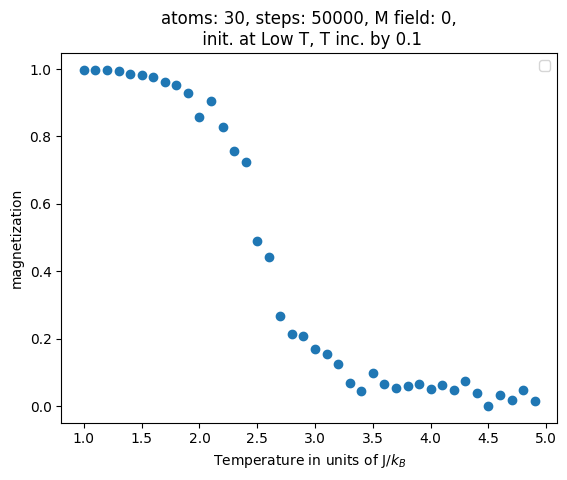

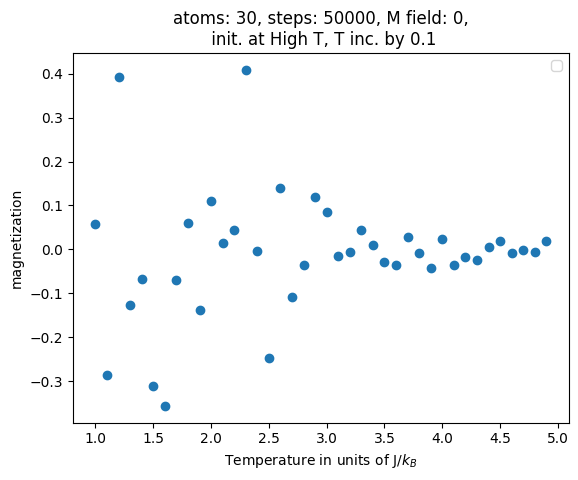

In [18]:
exp1_cold=model.plots(N=30,start='Low')
exp1_cold.mag()
exp1_cold.show()

exp1_hot=model.plots(N=30,start='High')
exp1_hot.mag()
exp1_hot.show()

# Question 1
- A 'cold' start means that all the spins are aligned initially. Increasing temperature will introduce thermal energy into the system, which will excite the electrons and transition them into a higher energy state, potentially flipping the spin. This is seen in the first figure where the magnetisation begins at 1. Increasing the temperature decreases the magnetisation as the average spin alignment of the lattice decreases as some spins are now antiparallel to the inital lattice alignment. There is also a critical temperature $T_c$ which represents the point at which the lattice can no longer maintain its ordered behaviour and so undergoes a phase transition. The lattice now becomes paramagnetic. In comparison, the 'hot' start initialises the lattice with random spins, and so after 50,000 steps, the magnetisation of the lattice will also be randomised. As seen in the 'hot' start figure, there is no clear trend below $T_c$. At $T_c$ and above it, the lattice loses its ordered structure and so the magnetisation goes to 0 like its 'cold' start counterpart. The differences are because the init_lowT() function generates an array of ones.

## 4.1.2: On the same size lattice, plot susceptibility versus temperature

/Users/tobynguyen/Documents/PHYSICS REPORTS/Computational_Lab/Code/Ising_model.py:161: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


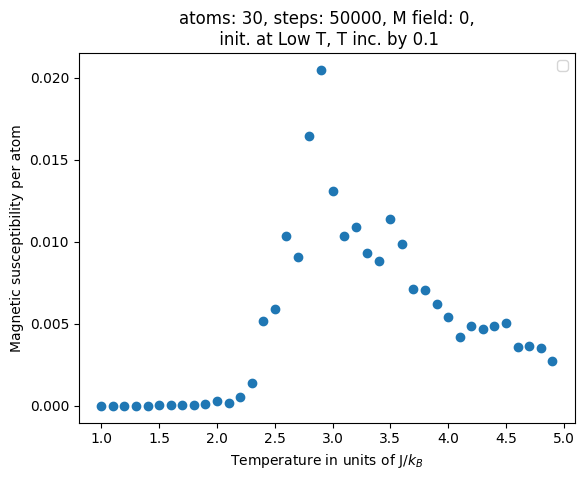

In [9]:
exp2 = model.plots(N=30, start='Low')
exp2.mag_sus()
exp2.show()

# Question 2
The value of $T_c$ can be determined when the lattice loses its ordering. Using the magnetic susceptibility plot, we find that its maximum lies around a temperature of 2.8J/kB. This indicates the temperature that the variance of the magnetisation is the highest, i.e the last point at which the ordered turns into disorder. This also corresponds to the point at which in the first two figures, the temperatures above this point go to zero. However, due to the limited number of steps, there is a larger amount of uncertainty about this value. To improve, we can increase the number of steps and also increase the increments we are going up in the temperature.

## 4.1.3: Maps of spin distribution at four temperatures, on a bigger lattice

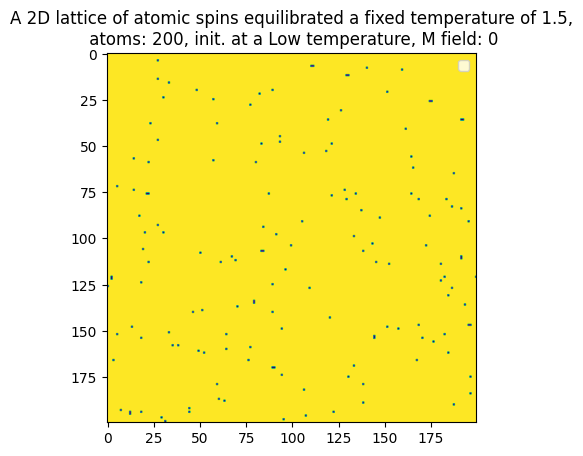

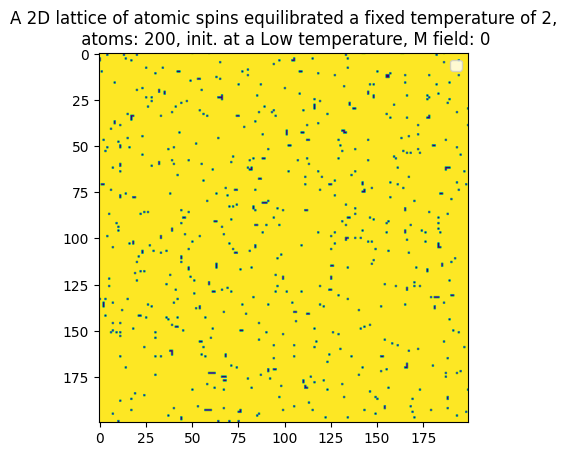

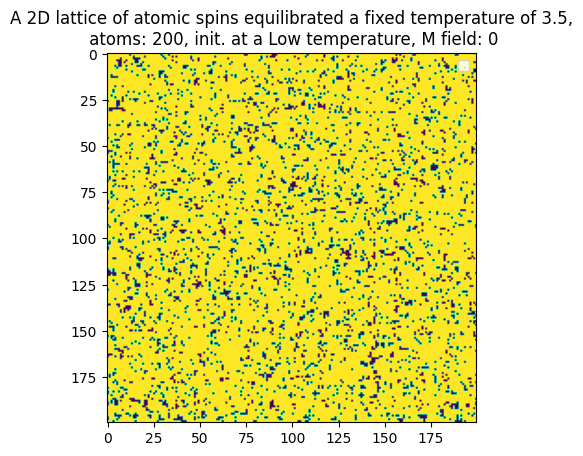

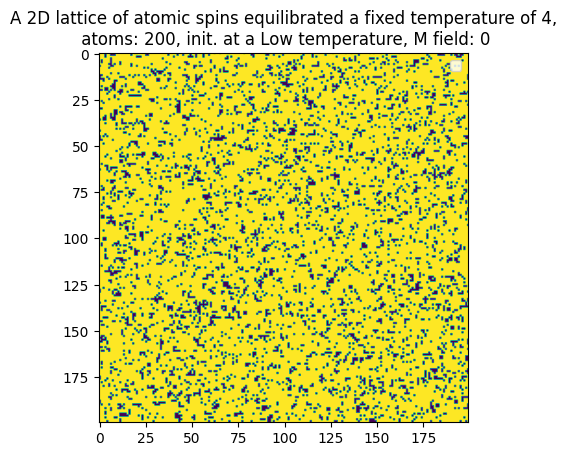

In [19]:
exp3_1_5 = model.plots(N=200,T=1.5)
exp3_1_5.lattice()
exp3_1_5.show()

exp3_2 = model.plots(N=200,T=2)
exp3_2.lattice()
exp3_2.show()

exp3_3_5 = model.plots(N=200,T=3.5)
exp3_3_5.lattice()
exp3_3_5.show()

exp3_4 = model.plots(N=200,T=4)
exp3_4.lattice()
exp3_4.show()

# Question 3
The increasing temperature increases the disorder in the system, i.e the probability that spins become antialigned to its initial state. As all these plots are 'cold' starts, initialy they are all aligned and applying the Metropolis algorithm, the more the temperature increases, the higher the chance the randomly chosen spins get flipped.

## 4.1.4: Turn on an external magnetic field and remake the cold start plots for magnetization, magnetic susceptibility and energy, and the four spin maps
### To keep the two terms in the Hamiltonian comparable, B should be on the order of 1; otherwise it doesn't matter (if it's too small) or it dominates (if it's too large).

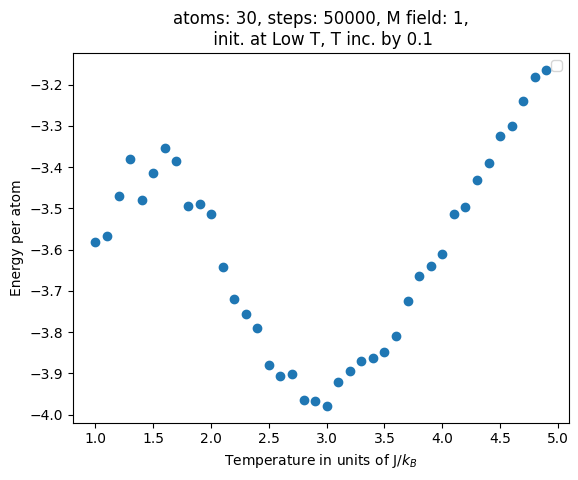

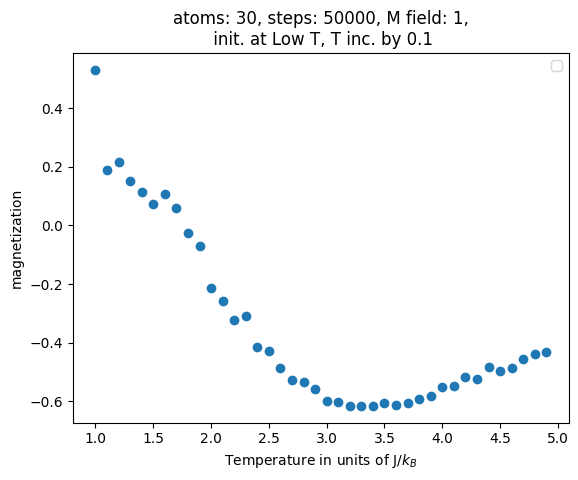

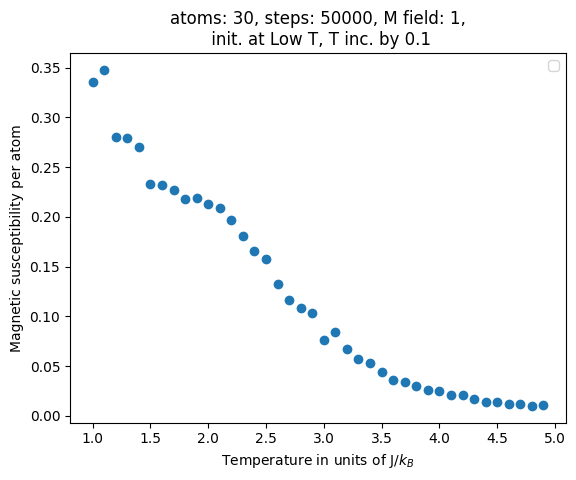

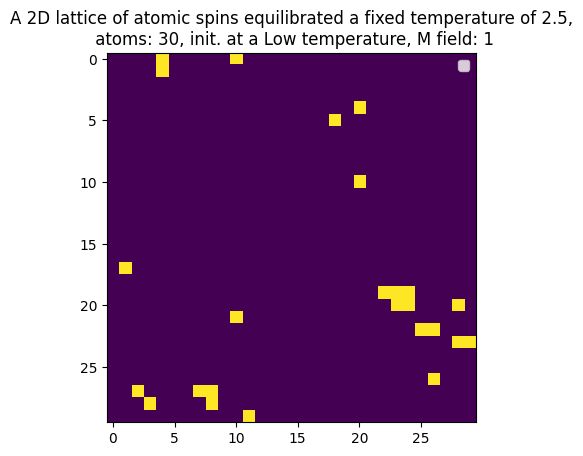

In [22]:
exp4 = model.plots(N=30, B=1,T=2.5)
exp4.E()
exp4.show()
exp4.mag()
exp4.show()
exp4.mag_sus()
exp4.show()
exp4.lattice()
exp4.show()

# Question 4
- In the Hamiltonian, adding an external magnetic field will add an extra term. This can be seen in the energy per atom and magnetisation graphs, the region before $T_c$ is largely similar as before, however with a large offset. Past the critical temperature, the magnetisation starts to minimise and then begins to increase, indicating the fact that increasing temperature in a paramagnet with an applied external magnetic field will lower its absolute magnetisation as thermal energy is introduced.